In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('heart.csv')  ### Perfect for nonlinear relation

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
feature_ranking = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Show ranking
print("Feature Ranking:")
print(feature_ranking)

Feature Ranking:
cp          0.260778
ca          0.127375
thal        0.107567
oldpeak     0.092824
age         0.087232
chol        0.083976
thalach     0.066627
trestbps    0.052833
sex         0.036310
slope       0.034748
exang       0.025470
restecg     0.017974
fbs         0.006287
dtype: float64


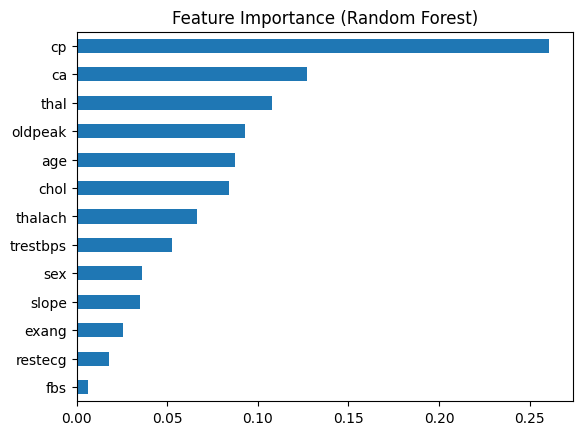

In [ ]:
# Plot
feature_ranking.plot(kind='barh', title="Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso  ## Perfect for linear relleation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize features (important for Lasso!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_scaled, y)

# Get coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

Non-zero coefficients (important features):
sex       -0.013325
cp         0.062403
thalach    0.039048
exang     -0.047834
oldpeak   -0.063369
ca        -0.047761
thal      -0.022801
dtype: float64


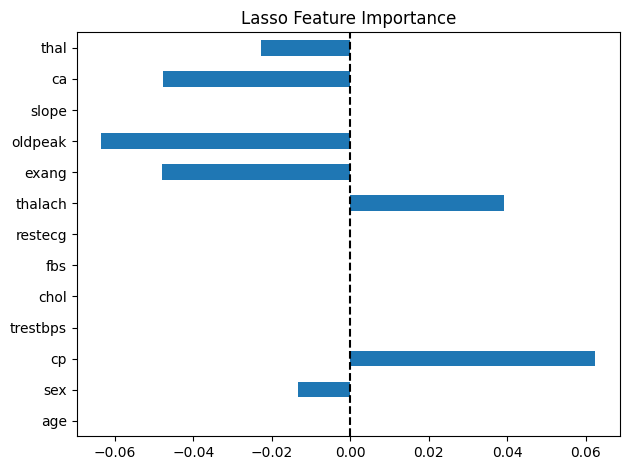

In [ ]:
 #Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_scaled, y)

# Get coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

# Print non-zero features
print("Non-zero coefficients (important features):")
print(coef[coef != 0])

# Plot feature importance
coef.plot(kind='barh', title="Lasso Feature Importance")
plt.axvline(x=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression   ### Perfect for Non_linear Data Set

In [ ]:
# Calculate mutual information
mi_scores = mutual_info_regression(X, y)

# Wrap as DataFrame
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display
print("Mutual Information Scores:\n", mi_df)

Mutual Information Scores:
 chol        0.267071
oldpeak     0.167888
thalach     0.154040
ca          0.138874
cp          0.135460
thal        0.121961
exang       0.120866
trestbps    0.083923
slope       0.076997
age         0.072258
sex         0.020401
fbs         0.009554
restecg     0.002236
dtype: float64


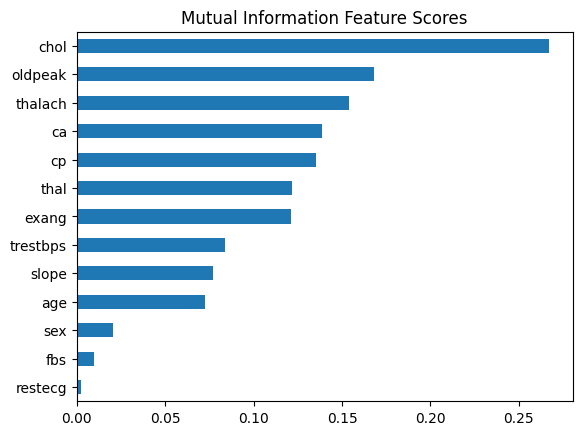

In [ ]:
 #Plot
mi_df.plot(kind='barh', title='Mutual Information Feature Scores')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
### Sub set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_full, y_train_full)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train_full, y_train_full)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [ ]:
sorted_feature = feature_importances.argsort()

In [ ]:
# Select feature for for sub set

In [ ]:
subset_1_feature = sorted_feature.index[[0,3,4,7,8,11]]
subset_2_feature = sorted_feature.index[[1,2,5,6,9,10]]


In [ ]:
## create subset DataFrame

In [ ]:
X_subset_1 = X[subset_1_feature]
X_subset_2 = X[subset_2_feature]

In [ ]:
# subset wise split for training and validation

In [ ]:
X_train_subset_1, X_val_subset_1, y_train_subset_1, y_val_subset_1 = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_subset_2, X_val_subset_2, y_train_subset_2, y_val_subset_2 = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

In [ ]:
# X subset for leater use

In [ ]:
X_test_sub1 = X_subset_1.iloc[X_test.index]
X_test_sub2 = X_subset_2.iloc[X_test.index]

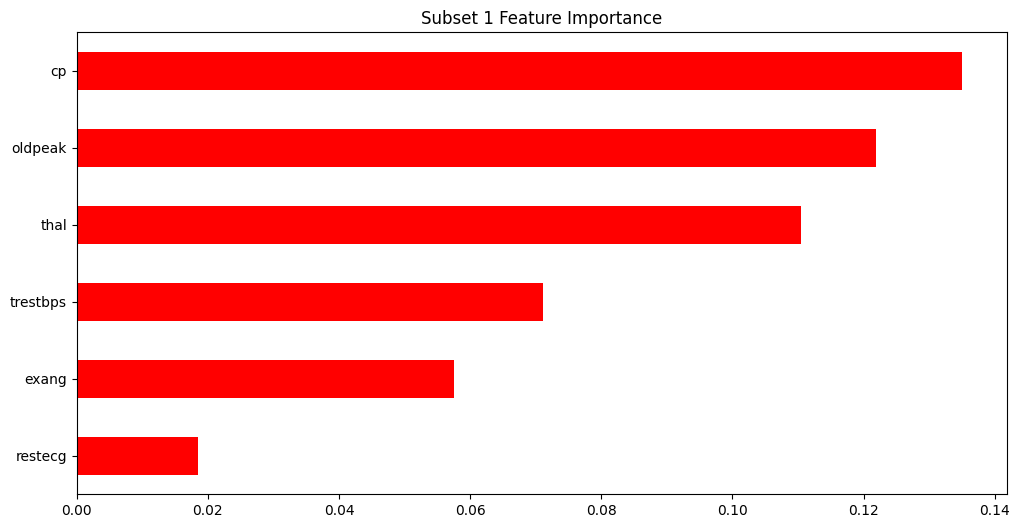

In [ ]:
plt.figure(figsize=(12, 6))
suset_1_importance = feature_importances[subset_1_feature]
subset_1_importance.sort_values(ascending = True).plot(kind='barh', color='r')
plt.title('Subset 1 Feature Importance')
plt.show()
suset_2_importance = feature_importances[subset_2_feature]

In [ ]:
from google.colab import files



In [ ]:
plt.savefig('subset1_feature_importance.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
## files download
files.download('subset1_feature_importance.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

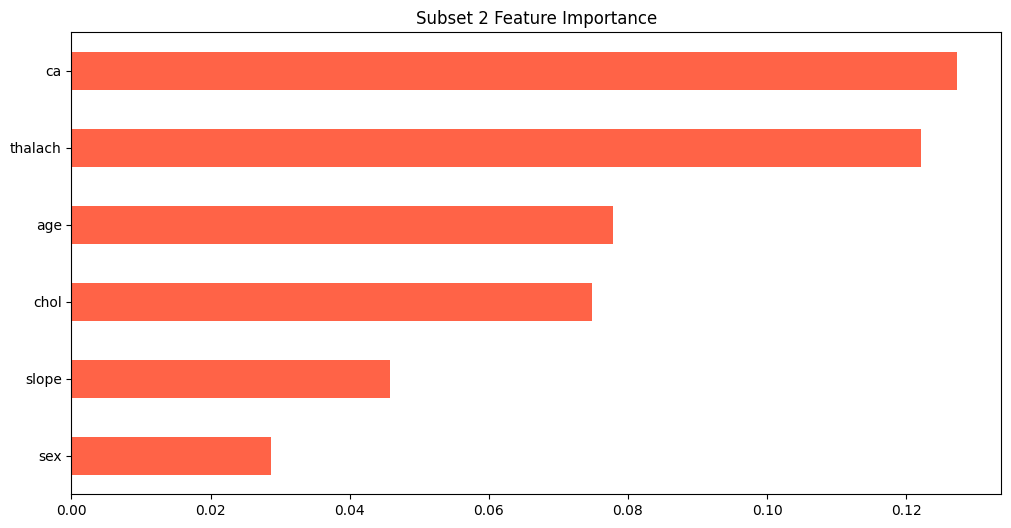

In [ ]:
plt.figure(figsize=(12, 6))
subset_2_importance = feature_importances[subset_2_feature]  # fixed typo & name
subset_2_importance.sort_values(ascending=True).plot(kind='barh',color = 'tomato')
plt.title('Subset 2 Feature Importance')
plt.show()
